<a href="https://colab.research.google.com/github/wakoTheDev/seizemic-detection/blob/main/seizmic_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%pip install obspy tensorflow


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, filtfilt

In [2]:
file_path = '/content/drive/MyDrive/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv'

In [3]:
# Load the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    print(df.info())
    # Check the first few rows and column types
    print(df.head())
    print(df.dtypes)

    # Convert 'time_abs' to datetime format
    df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

    # Convert 'time_rel' to numeric (float)
    df['time_rel(sec)'] = pd.to_numeric(df['time_rel(sec)'], errors='coerce')

    # Check the data types after conversion
    print("Data Types After Conversion:")
    print(df.dtypes)

    # Return the processed DataFrame
    return df


processed_data = load_and_preprocess_data(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   filename                        76 non-null     object 
 1   time_abs(%Y-%m-%dT%H:%M:%S.%f)  76 non-null     object 
 2   time_rel(sec)                   76 non-null     float64
 3   evid                            76 non-null     object 
 4   mq_type                         76 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.1+ KB
None
                                 filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0  xa.s12.00.mhz.1970-01-19HR00_evid00002     1970-01-19T20:25:00.000000   
1  xa.s12.00.mhz.1970-03-25HR00_evid00003     1970-03-25T03:32:00.000000   
2  xa.s12.00.mhz.1970-03-26HR00_evid00004     1970-03-26T20:17:00.000000   
3  xa.s12.00.mhz.1970-04-25HR00_evid00006     1970-04-25T01:14:00.000000   
4  xa.s12.00.mhz.1970-04-26HR00_ev

In [4]:
processed_data.head()

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19 20:25:00,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25 03:32:00,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26 20:17:00,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25 01:14:00,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26 14:29:00,52140.0,evid00007,deep_mq


**Creating waves based on lunar data**

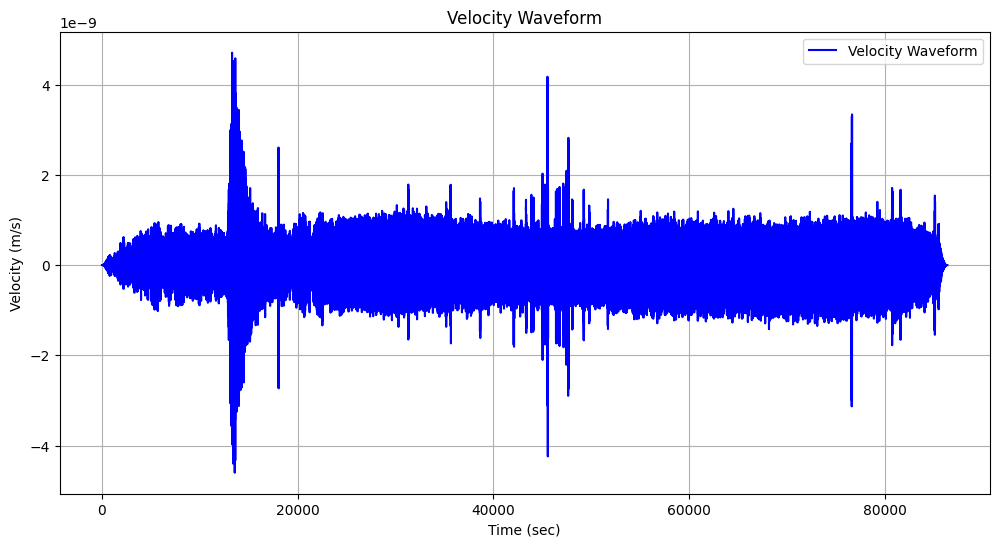

In [5]:
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns={df.columns[0]: 'time_abs(%Y-%m-%dT%H:%M:%S.%f)',df.columns[1]: 'time_rel(sec)',df.columns[2]: 'velocity(m/s)'},inplace=True)
    df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'] = pd.to_datetime(df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')
    df['time_rel(sec)'] = pd.to_numeric(df['time_rel(sec)'], errors='coerce')
    df['velocity(m/s)'] = pd.to_numeric(df['velocity(m/s)'], errors='coerce')
    df.dropna(inplace=True)

    return df

# Function to generate waveform
def generate_waveform(df):
    velocity = df['velocity(m/s)']

    plt.figure(figsize=(12, 6))
    plt.plot(df['time_rel(sec)'], df['velocity(m/s)'], label='Velocity Waveform', color='blue')
    plt.title('Velocity Waveform')
    plt.xlabel('Time (sec)')
    plt.ylabel('Velocity (m/s)')
    plt.grid()
    plt.legend()
    plt.show()


file_path = '/content/drive/MyDrive/data/lunar/training/data/s12_gradeA/xa.s12.00.mhz.1970-03-25HR00_evid00003.csv'
processed_data = load_and_preprocess_data(file_path)

# Generate waveform
generate_waveform(processed_data)

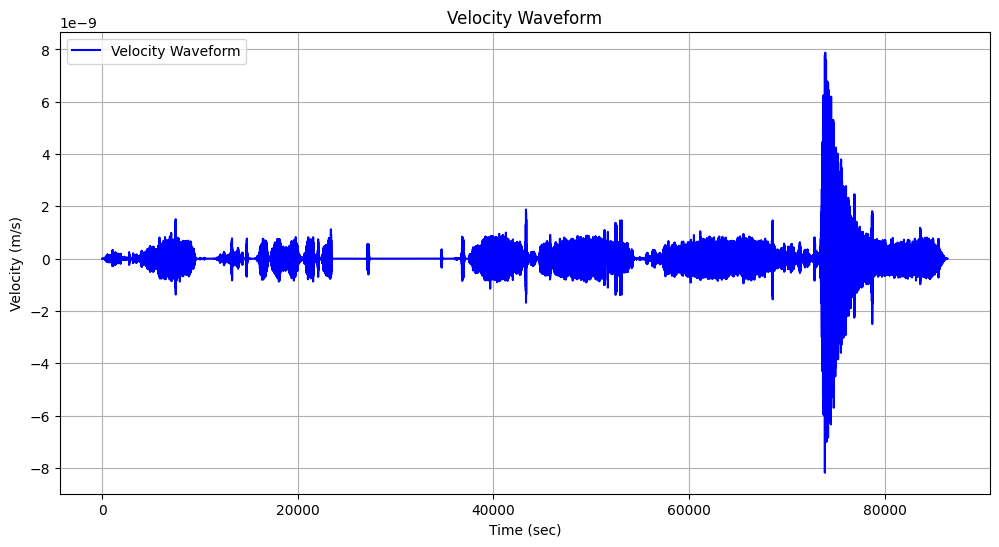

In [6]:
generate_waveform(load_and_preprocess_data("/content/drive/MyDrive/data/lunar/training/data/s12_gradeA/xa.s12.00.mhz.1970-01-19HR00_evid00002.csv"))

**Creating wave based on mars data**

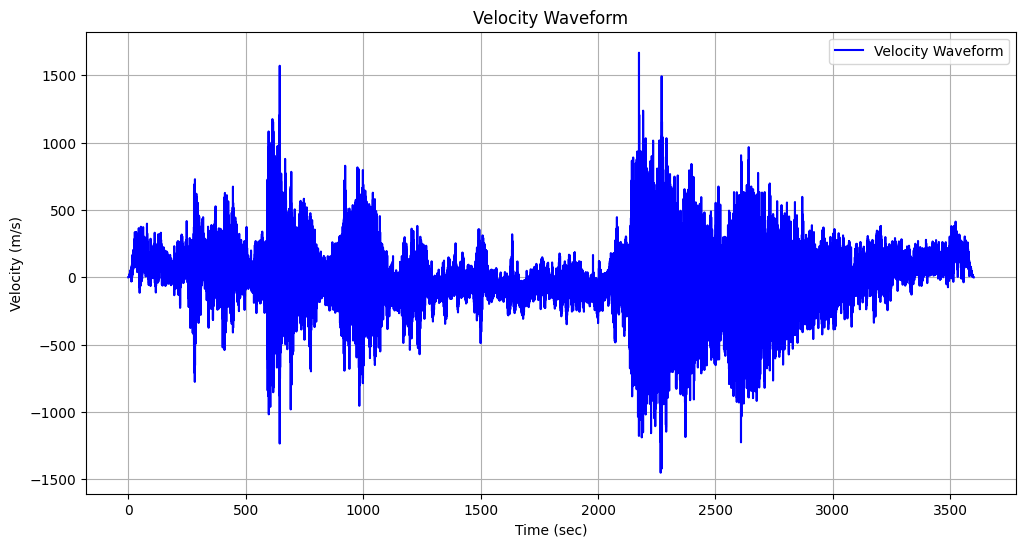

In [7]:
generate_waveform(load_and_preprocess_data("/content/drive/MyDrive/data/mars/training/data/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.csv"))

In [8]:
# merging mars and luna data
df = load_and_preprocess_data(file_path)
mars_df = load_and_preprocess_data("/content/drive/MyDrive/data/mars/training/data/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.csv")


In [9]:
df = pd.concat([df, mars_df], ignore_index=True)

In [10]:
df.head()


,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-03-25 00:00:00.440000,0.000000,-5.481780e-15
1,1970-03-25 00:00:00.590943,0.150943,-6.878653e-15
2,1970-03-25 00:00:00.741887,0.301887,-7.486137e-15
3,1970-03-25 00:00:00.892830,0.452830,-7.191481e-15
4,1970-03-25 00:00:01.043774,0.603774,-6.287278e-15


In [11]:
df.shape

(644411, 3)

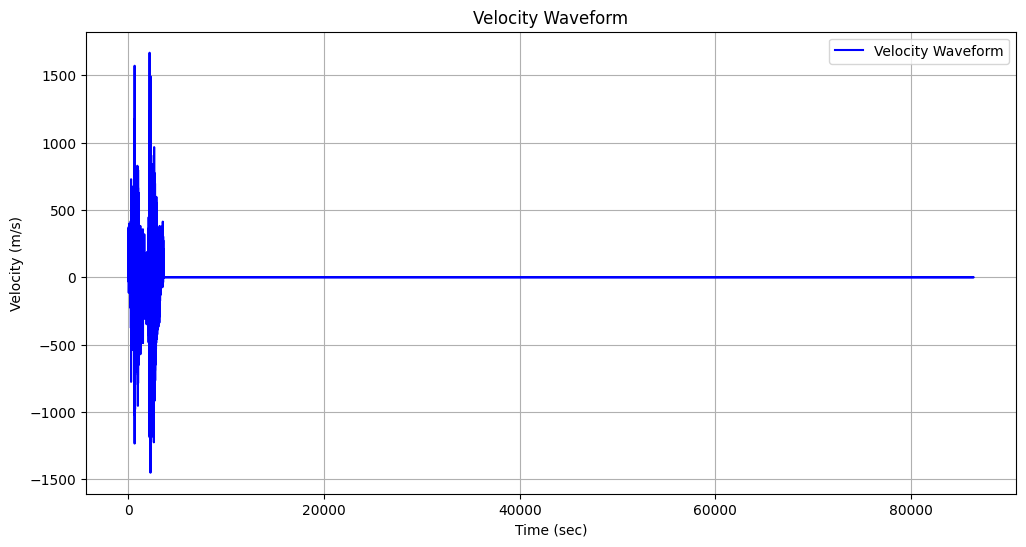

In [12]:
# generating a wave for the merged data
generate_waveform(df)

In [13]:
# Function to create a bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


# Function to apply the bandpass filter
def apply_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    required_length = 35
    #  Check if the data is long enough for filtering
    if len(data) < required_length:
        pad_width = ((required_length - len(data)) // 2, (required_length - len(data)) // 2)
        data = np.pad(data, pad_width, 'constant')
        y = filtfilt(b, a, data)
        return y
    else:
        return data


# Function to classify signals based on amplitude
def classify_signals(df, lowcut=1.0, highcut=10.0, fs=100.0, amplitude_threshold=1.0):
    results = []
    for index, row in df.iterrows():
        time = row['time_rel(sec)']
        velocity = row['velocity(m/s)']

        # Apply bandpass filter to the velocity signal
        if isinstance(velocity, (int, float, np.number)):
            # If velocity is a single value, create a small array for filtering
            velocity = np.array([velocity])

        filtered_signal = apply_bandpass_filter(velocity, lowcut, highcut, fs)

        # Check if filtered_signal is valid for classification
        if len(filtered_signal) > 0 and np.issubdtype(filtered_signal.dtype, np.number):
            # Drop NaN values from the filtered signal
            filtered_signal = filtered_signal[~np.isnan(filtered_signal)]

            # Classify based on amplitude
            max_amplitude = np.max(filtered_signal)
            min_amplitude = np.min(filtered_signal)

            if max_amplitude >= amplitude_threshold and min_amplitude <= -amplitude_threshold:
                label = 'valid'
            else:
                label = 'invalid'
        else:
            # Handle cases with insufficient or invalid data
            label = 'invalid'

        results.append({
            'index': index,
            'time_rel(sec)': time,
            'velocity(m/s)': velocity,
            'label': label
        })

    return pd.DataFrame(results)

# Classify the signals
classified_df = classify_signals(df)
print(classified_df)


         index  time_rel(sec)              velocity(m/s)    label
0            0       0.000000   [-5.481780117043957e-15]  invalid
1            1       0.150943   [-6.878652555543394e-15]  invalid
2            2       0.301887    [-7.48613707277403e-15]  invalid
3            3       0.452830    [-7.19148096701942e-15]  invalid
4            4       0.603774  [-6.2872777798960876e-15]  invalid
...        ...            ...                        ...      ...
644406  644406    3599.750000        [0.010700369391529]  invalid
644407  644407    3599.800000       [0.0061926530266121]  invalid
644408  644408    3599.850000       [0.0020467310154922]  invalid
644409  644409    3599.900000       [0.0005548419436996]  invalid
644410  644410    3599.950000                      [0.0]  invalid

[644411 rows x 4 columns]


In [17]:
# data labelling
classified_df['label'].value_counts()

,count
label,
invalid,578591
valid,65820


In [18]:
classified_df.head()

,index,time_rel(sec),velocity(m/s),label
0,0,0.000000,[-5.481780117043957e-15],invalid
1,1,0.150943,[-6.878652555543394e-15],invalid
2,2,0.301887,[-7.48613707277403e-15],invalid
3,3,0.452830,[-7.19148096701942e-15],invalid
4,4,0.603774,[-6.2872777798960876e-15],invalid


In [19]:
classified_df['label'].value_counts()

,count
label,
invalid,578591
valid,65820


In [24]:
classified_df['label'] = classified_df['label'].map({'valid':1,'invalid':0}).astype(float)
classified_df['label']

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
644406,0.0
644407,0.0
644408,0.0
644409,0.0


In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
classified_df['velocity(m/s)'] = scale.fit_transform(classified_df['velocity(m/s)'].values.reshape(-1,1))
classified_df['time_rel(sec)'] = scale.fit_transform(classified_df['time_rel(sec)'].values.reshape(-1,1))

In [28]:
X = classified_df.drop('label',axis=1)
y = classified_df['label']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# neural network model
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history =  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7924 - loss: 121.4646 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 2/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.8970 - loss: 0.3426 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 3/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8960 - loss: 1.7882 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 4/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8975 - loss: 0.3311 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 5/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8978 - loss: 0.3314 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 6/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.8978 - loss: 0.5500 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 7/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8979 - loss: 0.3503 - val_accuracy: 0.8993 - val_loss: 0.3266
Epoch 8/10
12889/12889 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy

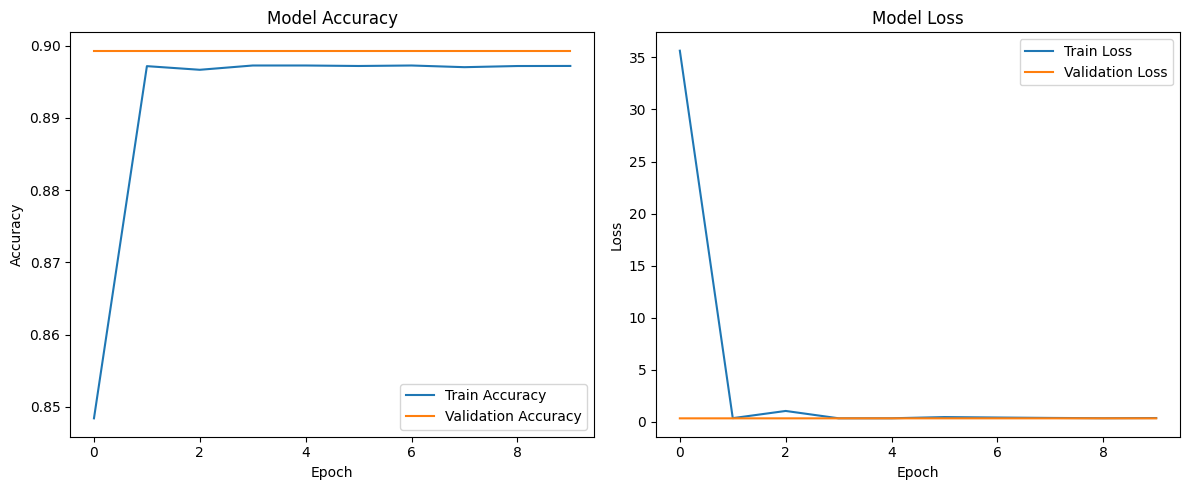

In [37]:
import matplotlib.pyplot as plt
# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

plot_history(history)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model.evaluate(X_test,y_test)

4028/4028 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8987 - loss: 0.3282


[0.3284415006637573, 0.8986212015151978]